[1] 4.970008 4.970000

[1] 4.97

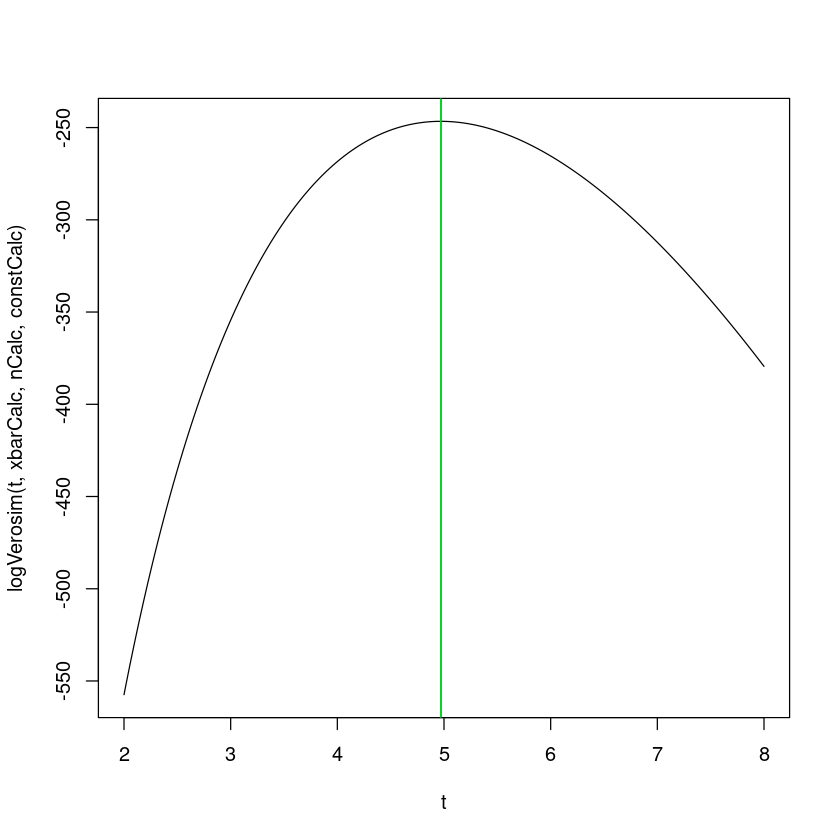

In [1]:
#-----------a-------------

fA <- function(x, theta) {
    exp(-2*theta) * (2*theta)^x / factorial(x)
}

xA <- c(8,12,6,14,9,12,15,7,15,7,10,10,14,9,12,15,11,6,8,6,8,8,9,12,13,10,11,11,13,15,10,8,7,8,13,9,9,13,12,9,10,6,10,8,10,11,12,11,9,10,7,8,8,16,7,15,10,10,8,14,13,4,11,13,6,9,13,10,10,12,11,5,6,4,9,6,9,7,13,9,11,5,5,9,15,10,11,10,14,7,11,9,14,10,5,10,8,12,13,11)

estimationsA <- function(sample) {
    nCalc <- length(sample)
    xbarCalc <- mean(sample)
    constCalc <- sum(log(factorial(sample)))

    logVerosim <- function(theta, xbar, n, const) {
        -2 * n * theta + n * xbar * log(2*theta) - const
    }
    t <- seq(min(sample) / 2, max(sample) / 2, 0.0001)
    plot(t, logVerosim(t,xbarCalc,nCalc,constCalc),type="l")

    fOptim <- function(theta) {
        logVerosim(theta, xbarCalc,nCalc,constCalc)
    }

    verRes <- optimize(fOptim, c(min(sample) / 2, max(sample) / 2), maximum=T)$maximum
    momRes <- mean(sample) / 2

    teoretic <- mean(sample) / 2

    abline(v = verRes, col="red")
    abline(v = teoretic, col="blue")
    abline(v = momRes, col="green")

    return(c(verRes, momRes))
}

estimationsA(xA)
mean(xA)/2

[1] 0.2014445 0.2014286

[1] 0.2014286

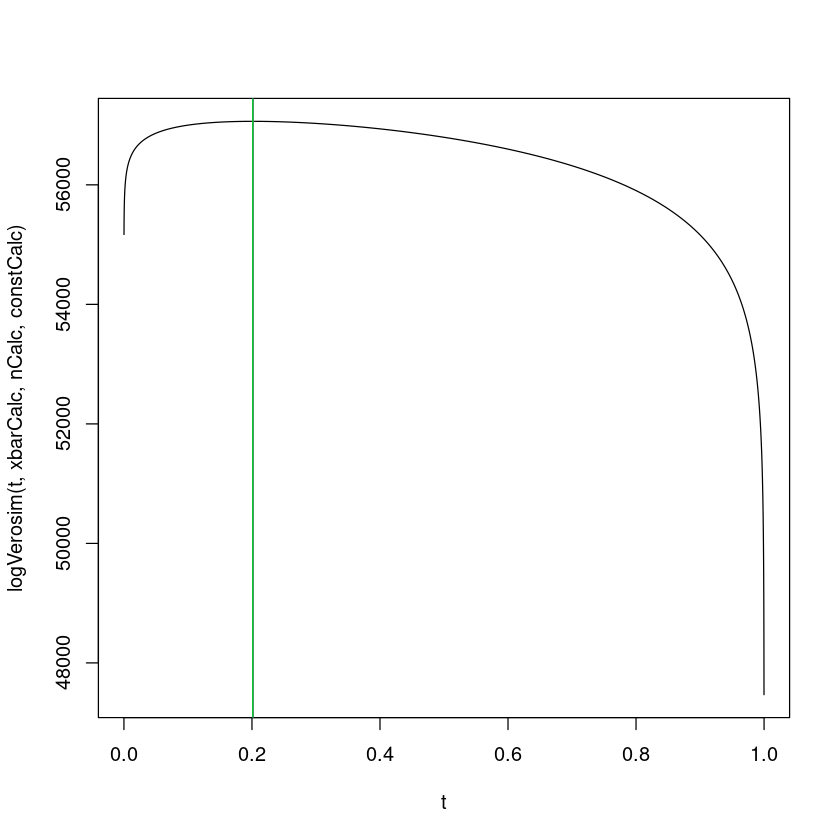

In [2]:
#-----------b-------------

fB <- function(x, m, theta) {
    choose(m,x) * theta^x * (1-theta)^(m-x)
}

xB <- c(3,2,1,4,2,3,4,1,3,2,2,4,2,1,7,5,4,5,5,2,3,4,3,1,2,4,1,1,2,3,1,3,1,4,1,3,1,6,1,3,3,4,3,1,3,2,2,3,2,4,1,1,2,6,3,1,3,6,1,2,3,6,3,2,2,2,4,2,1,3,3,4,2,3,4,1,4,4,6,3,3,5,2,2,2,3,1,3,1,3,3,5,3,4,3,2,4,2,3,3)

mB <- 14

estimationsB <- function(sample, m) {
    nCalc <- length(sample)
    xbarCalc <- mean(sample)
    constCalc <- sum(choose(m, sample))

    logVerosim <- function(theta, xbar, n, const) {
        const + n * xbar * log(theta) + n * (m-xbar) * log(1-theta)
    }
    t <- seq(0.0001, 1-0.0001, 0.0001)
    plot(t, logVerosim(t,xbarCalc,nCalc,constCalc),type="l")

    fOptim <- function(theta) {
        logVerosim(theta, xbarCalc,nCalc,constCalc)
    }

    verRes <- optimize(fOptim, c(0.0001, 1-0.0001), maximum=T)$maximum
    momRes <- mean(sample) / m

    teoretic <- mean(sample) / m

    abline(v = verRes, col="red")
    abline(v = teoretic, col="blue")
    abline(v = momRes, col="green")

    return(c(verRes, momRes))
}

estimationsB(xB, mB)
mean(xB)/mB

[1] 1.993280 1.993285

[1] 1.993285

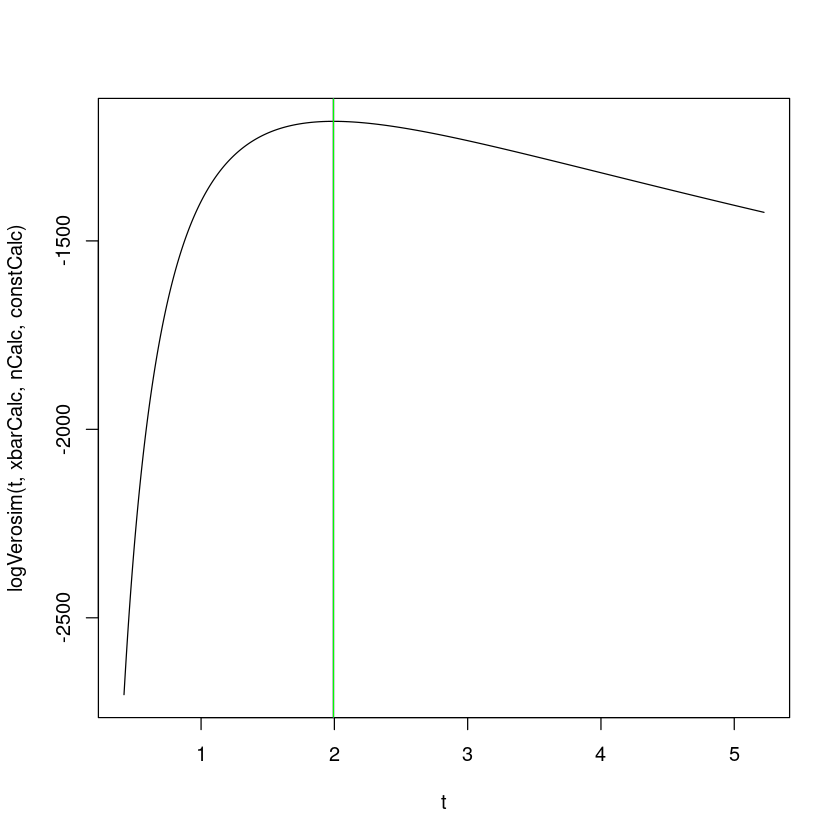

In [3]:
#-----------c-------------

fC <- function(x, alpha, theta) {
    exp(-x/theta) * x^(alpha-1) / (gamma(alpha) * theta^alpha)
}

xC <- c(6.269128,25.204245,13.994878,13.391437,11.458827,10.565065,11.706398,10.625808,7.485952,16.353358,9.277565,8.566438,14.788638,6.830955,9.542004,20.272463,36.562137,12.244005,16.084879,11.454008,15.592298,6.332908,13.106441,6.198981,15.726780,7.883712,35.124934,11.856011,13.766200,16.534869,16.803648,11.196542,19.785629,26.300717,21.270154,7.192149,5.882948,15.812796,10.963237,24.963600,13.802383,15.281262,10.310398,20.940469,23.992540,15.869985,12.041726,12.521264,10.869006,15.386514,14.636832,18.104562,17.029779,4.506616,20.941222,12.050877,9.757833,20.070802,12.472900,6.474476,15.059776,13.157344,9.124414,13.768482,24.354934,12.363936,11.110749,9.092514,17.856801,14.757801,13.898665,9.119410,11.430184,11.958829,13.516191,10.701083,14.713596,10.121266,16.945351,13.524070,14.742403,19.165805,10.338392,12.327837,19.619227,7.328246,14.894399,19.631003,7.622796,12.343832,13.138183,10.061520,17.674638,9.675168,12.115561,15.182861,13.292479,17.888244,16.695139,2.952334)

alphaC <- 7

estimationsC <- function(sample, alpha) {
    nCalc <- length(sample)
    xbarCalc <- mean(sample)
    constCalc <- (alpha-1) * sum(log(sample)) - nCalc * lgamma(alpha)

    logVerosim <- function(theta, xbar, n, const) {
        -n * xbar / theta - n * alpha * log(theta)
    }
    t <- seq(min(sample) / alpha, max(sample) / alpha, 0.0001)
    plot(t, logVerosim(t,xbarCalc,nCalc,constCalc),type="l")

    fOptim <- function(theta) {
        logVerosim(theta, xbarCalc,nCalc,constCalc)
    }

    verRes <- optimize(fOptim, c(min(sample) / alpha, max(sample) / alpha), maximum=T)$maximum
    momRes <- mean(sample) / alpha

    teoretic <- mean(sample) / alpha

    abline(v = verRes, col="red")
    abline(v = teoretic, col="blue")
    abline(v = momRes, col="green")

    return(c(verRes, momRes))
}

estimationsC(xC, alphaC)
mean(xC)/alphaC

[1] 25.85001 25.85000

[1] 25.85

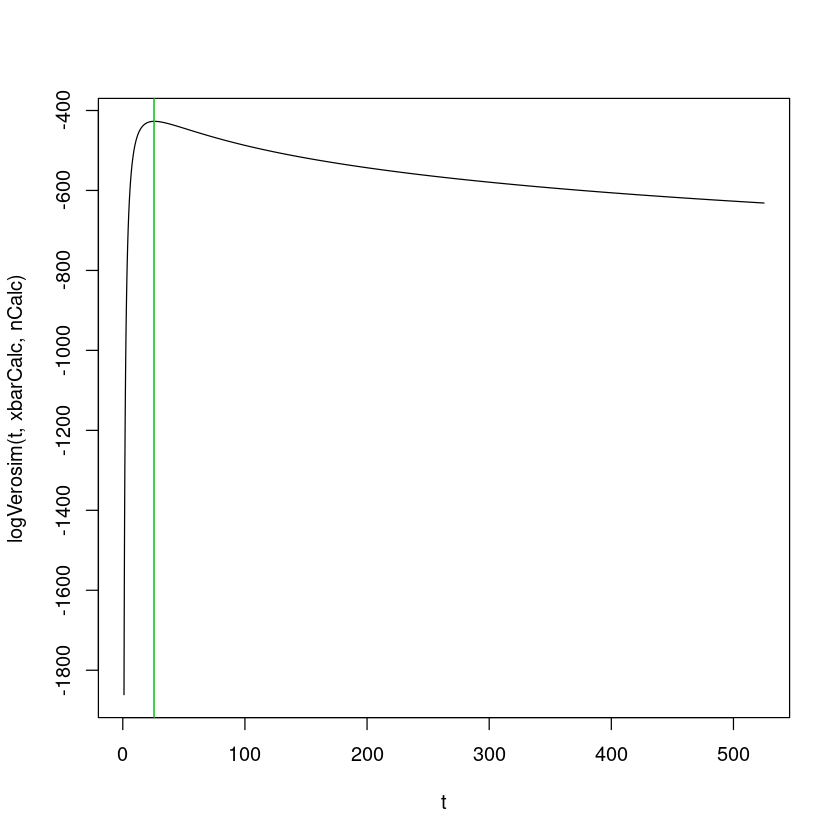

In [4]:
#-----------d-------------

fD <- function(x, theta) {
    theta^x / (1+theta)^(1+x)
}

xD <- c(6,3,24,24,4,56,10,13,2,28,24,2,22,11,2,8,118,2,14,19,7,9,8,189,2,9,21,6,6,2,3,2,3,18,3,2,21,1,5,9,11,13,19,76,1,5,9,4,57,1,2,16,5,2,20,8,1,40,6,4,19,6,3,2,4,9,1,5,10,12,6,525,19,6,17,2,5,159,5,62,6,3,45,21,23,3,17,2,1,1,474,15,3,3,7,7,13,4,38,4)

estimationsD <- function(sample) {
    nCalc <- length(sample)
    xbarCalc <- mean(sample)

    logVerosim <- function(theta, xbar, n) {
        n * xbar * log(theta) - (n + n*xbar) * log(theta+1)
    }
    t <- seq(min(sample), max(sample), 0.0001)
    plot(t, logVerosim(t,xbarCalc,nCalc),type="l")

    fOptim <- function(theta) {
        logVerosim(theta, xbarCalc,nCalc)
    }

    verRes <- optimize(fOptim, c(min(sample), max(sample)), maximum=T)$maximum
    momRes <- mean(sample)

    teoretic <- mean(sample)

    abline(v = verRes, col="red")
    abline(v = teoretic, col="blue")
    abline(v = momRes, col="green")

    return(c(verRes, momRes))
}

estimationsD(xD)
mean(xD)

[1] 3.3724484 0.5722134

[1] 3.372459

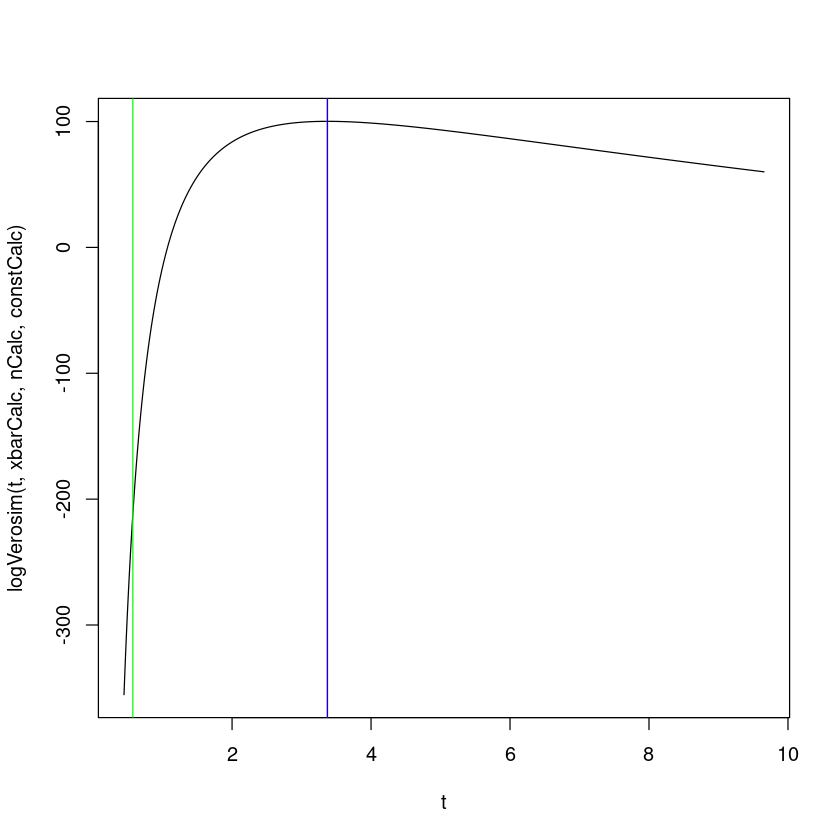

In [5]:
#-----------e-------------

fE <- function(x, alpha, theta) {
    alpha / theta * x^(alpha-1) * exp(-x/theta)
}

xE <- c(3.5930579,2.1027540,1.7820777,9.6550388,6.8803846,0.7388358,2.9194654,3.1178660,1.2323236,2.9776820,1.1172078,2.4184586,3.3258971,1.9498871,2.6088612,3.9535062,3.0389107,4.4226628,3.9366318,2.4551569,5.2814487,5.6778622,4.7683935,1.1581498,3.1270783,4.1473311,7.4830426,1.1342893,1.7773392,7.7510826,1.3919927,2.3613291,2.6234826,1.6562602,1.4992235,2.3455062,3.8458809,5.8333841,3.3834034,1.5202546,3.1248186,5.3029567,3.6225571,4.8309931,3.1579595,3.2640258,3.9538891,4.0796841,4.0991772,3.2779944,2.5002127,3.0654695,1.6996010,3.2175175,1.9033087,4.4052061,2.3158379,2.4778345,5.4382190,4.9141207,6.0978745,1.1428936,3.5639106,7.4541937,7.7778289,3.2859563,0.7432908,1.4442696,3.6619932,2.8361371,4.3180773,1.6763585,4.4464154,2.5049617,0.4448735,5.0518839,3.4151834,1.6823650,5.4517583,2.8212788,2.1566837,2.9893287,1.6925123,6.5197938,4.2165408,1.6728425,2.7650830,2.6742755,2.9622047,0.7809781,1.3913415,5.3430751,2.4859925,3.7329465,6.3129236,0.6635228,3.7640343,2.1850174,4.3773328,5.0931544)

alphaE <- 3

estimationsE <- function(sample, alpha) {
    nCalc <- length(sample)
    xbarCalc <- mean(sample)
    constCalc <- (alpha-1) * sum(log(sample))

    logVerosim <- function(theta, xbar, n, const) {
        n * (log(alpha) - log(theta)) + const - n * xbar / theta
    }
    t <- seq(min(sample), max(sample), 0.0001)
    plot(t, logVerosim(t,xbarCalc,nCalc,constCalc),type="l")

    fOptim <- function(theta) {
        logVerosim(theta, xbarCalc,nCalc,constCalc)
    }

    verRes <- optimize(fOptim, c(min(sample), max(sample)), maximum=T)$maximum
    momRes <- (mean(sample) / (alpha * gamma(alpha+1))) ^ (1/alpha)

    teoretic <- mean(sample)

    abline(v = verRes, col="red")
    abline(v = teoretic, col="blue")
    abline(v = momRes, col="green")

    return(c(verRes, momRes))
}

estimationsE(xE, alphaE)
mean(xE)
